## ASSIGNMENT 5
Tasya Salsabila - **130184106**

St. Nur Hikma Damayanti - **1301184002**


## IMPORT LIBRARY

In [34]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf 

In [35]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/
dirname='Chessman-image-dataset/Chess'
batchSize=64
shape=(150,150)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


## DATA PREP

In [36]:
def plot_imgs(item_dir, title=" ", num_imgs=4, cmap='viridis'):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(15, 15))
    for idx, img_path in enumerate(item_files):
        plt.subplot(8, 8, idx+1)
        img = plt.imread(img_path, 0)
        plt.title(title)
        plt.imshow(img, cmap=cmap)

    plt.tight_layout()

In [37]:
print('total gambar pawn :', len(os.listdir('Chessman-image-dataset/Chess/Pawn')))
print('total gambar king :', len(os.listdir('Chessman-image-dataset/Chess/King')))
print('total gambar knights :', len(os.listdir('Chessman-image-dataset/Chess/Knight')))

total gambar pawn : 107
total gambar king : 76
total gambar knights : 106


In [38]:
dir_train = os.path.join('Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) 

In [39]:
train_generator = train_datagen.flow_from_directory(
    dir_train,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') 
validation_generator = train_datagen.flow_from_directory(
    dir_train, 
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


## MODEL

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')])

In [41]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 36, 36, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)       

In [42]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=15,
                              verbose=2)

Epoch 1/15
63/63 - 35s - loss: 1.8909 - accuracy: 0.1884 - val_loss: 1.7887 - val_accuracy: 0.1923 - 35s/epoch - 563ms/step
Epoch 2/15
63/63 - 35s - loss: 1.7913 - accuracy: 0.2084 - val_loss: 1.7823 - val_accuracy: 0.2115 - 35s/epoch - 557ms/step
Epoch 3/15
63/63 - 36s - loss: 1.7916 - accuracy: 0.1603 - val_loss: 1.7837 - val_accuracy: 0.1923 - 36s/epoch - 564ms/step
Epoch 4/15
63/63 - 34s - loss: 1.7828 - accuracy: 0.1864 - val_loss: 1.7719 - val_accuracy: 0.2308 - 34s/epoch - 542ms/step
Epoch 5/15
63/63 - 34s - loss: 1.7699 - accuracy: 0.2605 - val_loss: 1.7741 - val_accuracy: 0.1923 - 34s/epoch - 542ms/step
Epoch 6/15
63/63 - 34s - loss: 1.7510 - accuracy: 0.2345 - val_loss: 1.7510 - val_accuracy: 0.2885 - 34s/epoch - 543ms/step
Epoch 7/15
63/63 - 34s - loss: 1.7130 - accuracy: 0.2525 - val_loss: 1.7073 - val_accuracy: 0.3077 - 34s/epoch - 541ms/step
Epoch 8/15
63/63 - 36s - loss: 1.6764 - accuracy: 0.2906 - val_loss: 1.6426 - val_accuracy: 0.3269 - 36s/epoch - 575ms/step
Epoch 9/

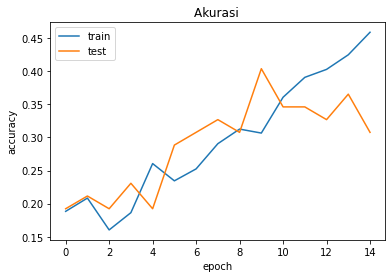

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

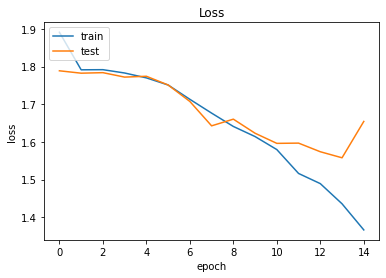

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()